# 📚 1. XOR 다층신경망

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Flatten
from sklearn import datasets
import keras
from keras.datasets import fashion_mnist

#import tensorflow.keras.datasets


In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.predict(X) > 0.5)  # accuracy

[[2.8613210e-04]
 [9.9819738e-01]
 [9.9958152e-01]
 [1.7573833e-03]]
[[False]
 [ True]
 [ True]
 [False]]


# 📚 2. ReLU 활성화 함수

In [4]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.predict(X) > 0.5)  # accuracy

[[0.3333732 ]
 [0.33337063]
 [0.99950206]
 [0.33337277]]
[[False]
 [False]
 [ True]
 [False]]


In [5]:
accs = []
for  i  in range(20) :
  model = Sequential()
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  hist = model.fit(X, y,  epochs=7000, verbose=0)
  acc = model.evaluate(X,y)
  accs.append(acc[1])   

1/1 [==============================] - 0s 109ms/step - loss: 0.4775 - accuracy: 0.7500


[[1.0483822e-05]
 [9.9999690e-01]
 [9.9994332e-01]
 [1.4495850e-04]]
1/1 [==============================] - 0s 94ms/step - loss: 5.3789e-05 - accuracy: 1.0000
[5.378942296374589e-05, 1.0]


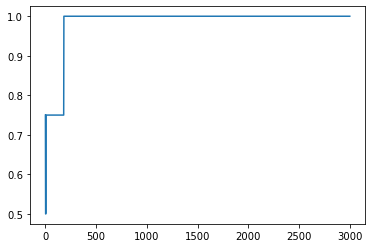

In [8]:
model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=3000, verbose=0)
print(model.predict(X))
print(model.evaluate(X, y))
plt.plot(hist.history['accuracy'])

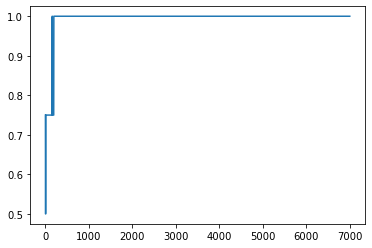

In [7]:
plt.plot(hist.history['accuracy'])

[[0.0019275 ]
 [0.9992367 ]
 [0.99662393]
 [0.00106677]]
1/1 [==============================] - 0s 75ms/step - loss: 0.0018 - accuracy: 1.0000
[0.0017855075420811772, 1.0]


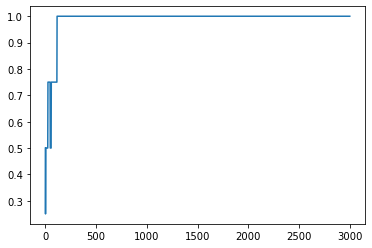

In [11]:
model = Sequential()
model.add(Dense(5, activation=LeakyReLU(0.1)))
model.add(Dense(5, activation=LeakyReLU(0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=3000, verbose=0)
print(model.predict(X))
print(model.evaluate(X, y))
plt.plot(hist.history['accuracy'])

In [16]:
# 최적의 파라미터를 찾기 위해서는 다양한 조건의 모델테스트를 통해 찾아야 한다.
layers = [3, 5, 10, 15, 20]

for ex in layers :
    model = Sequential()
    for i in range(ex) :
      model.add(Dense(5, activation=LeakyReLU(0.1)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(X, y,  epochs=3000, verbose=0)
    print(model.evaluate(X, y))

1/1 [==============================] - 0s 104ms/step - loss: 3.4793e-04 - accuracy: 1.0000
[0.0003479275619611144, 1.0]
1/1 [==============================] - 0s 169ms/step - loss: 2.1946e-05 - accuracy: 1.0000
[2.1945552362012677e-05, 1.0]
1/1 [==============================] - 0s 117ms/step - loss: 2.5583e-06 - accuracy: 1.0000
[2.5582728540030075e-06, 1.0]
1/1 [==============================] - 0s 137ms/step - loss: 2.2056e-06 - accuracy: 1.0000
[2.2056156012695283e-06, 1.0]
1/1 [==============================] - 0s 148ms/step - loss: 0.6931 - accuracy: 0.5000
[0.6931471824645996, 0.5]


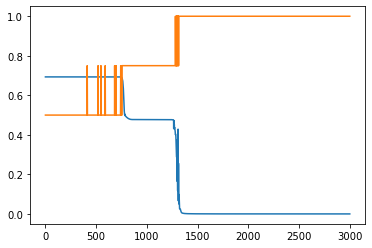

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

# 📚 3.가중치 초기화

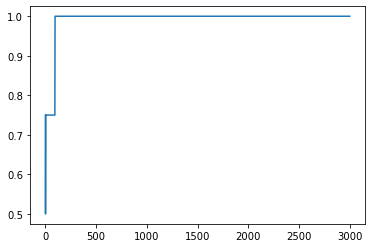

In [17]:
model = Sequential()
model.add(Dense(5, activation=LeakyReLU(0.1), kernel_initializer='he_normal'))
model.add(Dense(10, activation=LeakyReLU(0.1), kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=3000, verbose=0)
plt.plot(hist.history['accuracy'])

# 📚 4.fasion mnist 영상 인식

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


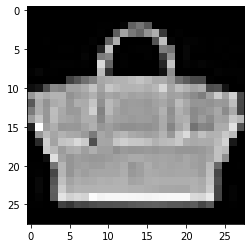

In [24]:
# 이미지 확인(범위)
x_train[0]   #흑백이미지 28x28  0~255
plt.imshow(x_train[233], cmap='gray')

In [25]:
# 레이블 확인  (레이블, one-hot, 정렬)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Text(0.5, 1.0, 'Ankle boot')

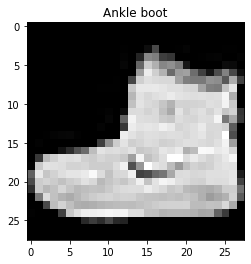

In [26]:
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])

In [30]:
# 네트워크 구성

x_train_1d = x_train.reshape(-1, 784)
print(x_train_1d.shape)

model = Sequential([
    Dense(128, input_shape=(784,)),   #  70% - 150% (2^ 사용)
    Activation('relu'),

    Dense(64),   #  70% - 150% (2^ 사용)
    Activation('relu'),

    Dense(10),
    Activation('softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train_1d, y_train, epochs=2)

(60000, 784)
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_417 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_418 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_419 (Dense)            (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
__________________________________

In [31]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.predict(X) > 0.5)  # accuracy

[[0.00204402]
 [0.9992229 ]
 [0.9986563 ]
 [0.00402713]]
[[False]
 [ True]
 [ True]
 [False]]


In [33]:
#Flatten 레이어 사용하기
#a = np.array([[[1,2], [3,4]]])
#print(a.shape)
#a.flatten()

model = Sequential([

    Flatten(input_shape=(28, 28)),  

    Dense(128), 
    Activation('relu'),

    Dense(64),  
    Activation('relu'),

    Dense(10),
    Activation('softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_431 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_432 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_433 (Dense)            (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)              

In [34]:
%%time
hist = model.fit(x_train, y_train, epochs=70)

Epoch 1/70
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8769 - accuracy: 0.6650
Epoch 2/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6857 - accuracy: 0.7304
Epoch 3/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6327 - accuracy: 0.7516
Epoch 4/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5303 - accuracy: 0.8084
Epoch 5/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4713 - accuracy: 0.8350
Epoch 6/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4283 - accuracy: 0.8494
Epoch 7/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4094 - accuracy: 0.8560
Epoch 8/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3935 - accuracy: 0.8619
Epoch 9/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3865 - accuracy: 0.8640
Epoch 10/70
1875/1875 [==============================] - 2s 1ms/step - loss: 0.368